In [1]:
import math
import tensorflow as tf
import tensorflow_datasets as tfds
import numpy as np
import matplotlib.pyplot as plt
import tqdm
import tqdm.auto

In [2]:
dataset, metadata = tfds.load('fashion_mnist', as_supervised=True, with_info=True)
train_dataset, test_dataset = dataset['train'], dataset['test']

Dl Completed...: 0 url [00:00, ? url/s]

Dl Size...: 0 MiB [00:00, ? MiB/s]

Extraction completed...: 0 file [00:00, ? file/s]

0 examples [00:00, ? examples/s]

Shuffling and writing examples to /root/tensorflow_datasets/fashion_mnist/3.0.1.incompleteD1B5BP/fashion_mnist-train.tfrecord


  0%|          | 0/60000 [00:00<?, ? examples/s]

0 examples [00:00, ? examples/s]

Shuffling and writing examples to /root/tensorflow_datasets/fashion_mnist/3.0.1.incompleteD1B5BP/fashion_mnist-test.tfrecord


  0%|          | 0/10000 [00:00<?, ? examples/s]

Dataset fashion_mnist downloaded and prepared to /root/tensorflow_datasets/fashion_mnist/3.0.1. Subsequent calls will reuse this data.


In [3]:
classes = ["Футболка / верх", "Шорты", "Свитер", 
           "Платье", "Плащ", "Сандали", "Рубашка", 
           "Кроссовок", "Сумка", "Ботинок"]

In [8]:
num_train_examples = metadata.splits['train'].num_examples
num_test_examples = metadata.splits['test'].num_examples
print(f'{num_train_examples}\n{num_test_examples}')

60000
10000


In [16]:
def img_normalize(img, labels):
  img = tf.cast(img, tf.float32)
  img /= 255
  return img, labels

In [17]:
def img_mirror(img, labels):
  return tf.image.flip_up_down(img), labels

In [18]:
train_dataset = train_dataset.map(img_normalize)
test_dataset = test_dataset.map(img_normalize).map(img_mirror)

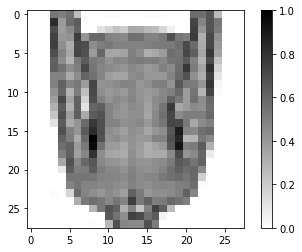

In [22]:
for img, label in test_dataset.take(1):
  break
img = img.numpy().reshape((28, 28))

plt.figure()
plt.imshow(img, cmap=plt.cm.binary)
plt.colorbar()
plt.grid(False)
plt.show()

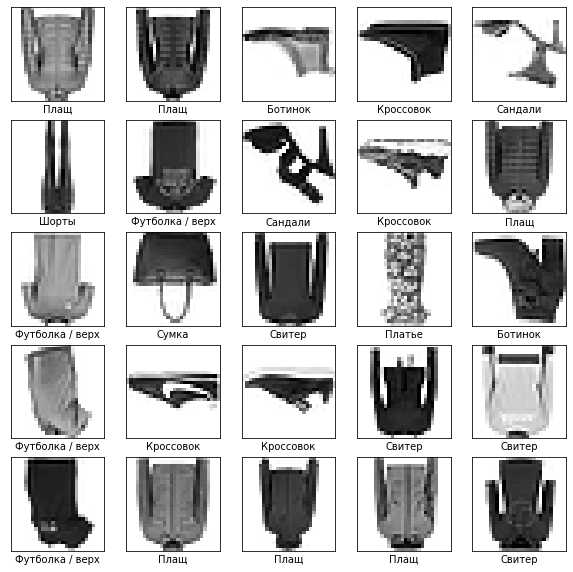

In [24]:
plt.figure(figsize=(10, 10))
plt.grid(False)
i = 0
for img, label in test_dataset.take(25):
  img = img.numpy().reshape((28, 28))
  plt.subplot(5, 5, i + 1)
  plt.xticks([])
  plt.yticks([])
  plt.imshow(img, cmap=plt.cm.binary)
  plt.xlabel(classes[label])
  i += 1
plt.show()

In [25]:
model = tf.keras.Sequential([
                             tf.keras.layers.Conv2D(32, (3, 3), padding='same', activation=tf.nn.relu, input_shape=(28, 28, 1)),
                             tf.keras.layers.MaxPooling2D((2, 2), strides=2),
                             tf.keras.layers.Conv2D(64, (3, 3), padding='same', activation=tf.nn.relu, input_shape=(28, 28, 1)),
                             tf.keras.layers.MaxPooling2D((2, 2), strides=2),
                             tf.keras.layers.Flatten(),
                             tf.keras.layers.Dense(128, activation=tf.nn.relu),
                             tf.keras.layers.Dense(10, activation=tf.nn.softmax),
])

In [26]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [27]:
BATCH_SIZE = 32
train_dataset = train_dataset.repeat().shuffle(num_train_examples).batch(BATCH_SIZE)
test_dataset = test_dataset.batch(BATCH_SIZE)

In [29]:
model.fit(train_dataset, epochs=5, steps_per_epoch=math.ceil(num_train_examples / BATCH_SIZE))

Epoch 1/5
1875/1875 [==============================] - 14s 6ms/step - loss: 0.3705 - accuracy: 0.8669
Epoch 2/5
1875/1875 [==============================] - 13s 7ms/step - loss: 0.3494 - accuracy: 0.8722
Epoch 3/5
1875/1875 [==============================] - 10s 5ms/step - loss: 0.3352 - accuracy: 0.8781
Epoch 4/5
1875/1875 [==============================] - 11s 6ms/step - loss: 0.3196 - accuracy: 0.8830
Epoch 5/5
1875/1875 [==============================] - 10s 5ms/step - loss: 0.3106 - accuracy: 0.8867


In [31]:
test_loss, test_accuracy = model.evaluate(test_dataset, steps=math.ceil(num_test_examples / BATCH_SIZE))

313/313 [==============================] - 3s 8ms/step - loss: 670.9889 - accuracy: 0.2598


In [32]:
for img, label in test_dataset.take(1):
  img = img.numpy()
  label = label.numpy()
  predictions = model.predict(img)

In [34]:
predictions.shape

(32, 10)

In [35]:
print(classes[np.argmax(predictions[0])])

Рубашка


In [37]:
label[0]

4

In [38]:
def plot_image(i, predictions_array, true_labels, images):
  predictions_array, true_label, img = predictions_array[i], true_labels[i], images[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])
  
  plt.imshow(img[...,0], cmap=plt.cm.binary)
  
  predicted_label = np.argmax(predictions_array)
  if predicted_label == true_label:
    color = 'blue'
  else:
    color = 'red'
    
  plt.xlabel("{} {:2.0f}% ({})".format(classes[predicted_label],
                                      100 * np.max(predictions_array),
                                      classes[true_label]),
                                      color=color)

def plot_value_array(i, predictions_array, true_label):
  predictions_array, true_label = predictions_array[i], true_label[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])
  thisplot = plt.bar(range(10), predictions_array, color="#777777")
  plt.ylim([0, 1])
  predicted_label = np.argmax(predictions_array)
  
  thisplot[predicted_label].set_color('red')
  thisplot[true_label].set_color('blue')

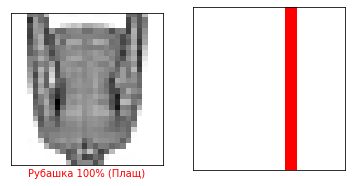

In [42]:
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i=0, predictions_array=predictions, true_labels=label, images=img)
plt.subplot(1,2,2)
plot_value_array(i=0, predictions_array=predictions, true_label=label)

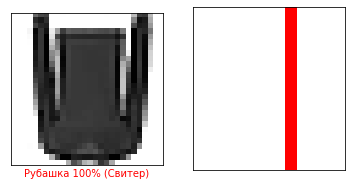

In [43]:
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i=12, predictions_array=predictions, true_labels=label, images=img)
plt.subplot(1,2,2)
plot_value_array(i=12, predictions_array=predictions, true_label=label)

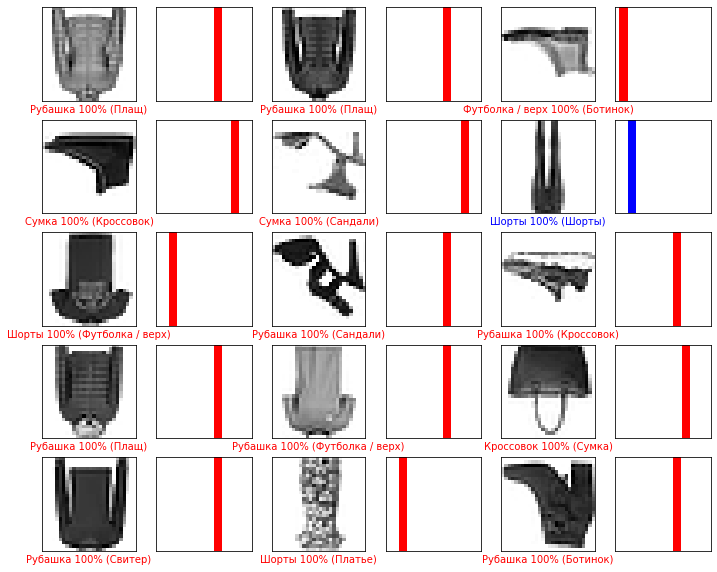

In [46]:
num_rows = 5
num_cols = 3
num_images = num_rows * num_cols
plt.figure(figsize=(2 * 2 * num_cols, 2 * num_rows))
for i in range(num_images):
  plt.subplot(num_rows, 2 * num_cols, 2 * i + 1)
  plot_image(i, predictions, label, img)
  plt.subplot(num_rows, 2 * num_cols, 2 * i + 2)
  plot_value_array(i, predictions, label)

In [47]:
n_img = img[0]
print(n_img.shape)

(28, 28, 1)


In [48]:
n_img = np.array([n_img])
print(n_img.shape)

(1, 28, 28, 1)


In [52]:
predictions_single = model.predict(n_img)
print(predictions_single)
print(classes[np.argmax(predictions_single[0])])

[[0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]]
Рубашка


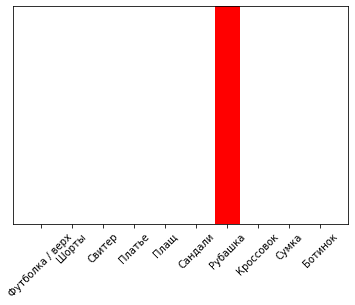

In [53]:
plot_value_array(0, predictions_single, label)
_ = plt.xticks(range(10), classes, rotation=45)